<a href="https://colab.research.google.com/github/enakai00/colab_GenAI_lecture/blob/main/04_Variational_AutoEncoder_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os, random
os.environ['PYTHONHASHSEED'] = str(20230629)
random.seed(20240329)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import layers, models

from tensorflow.keras.datasets import fashion_mnist

np.random.seed(20230629)
tf.random.set_seed(20230629)

In [18]:
(train_images, train_labels), _ = fashion_mnist.load_data()
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2)), constant_values=0)
train_images = train_images.reshape((len(train_images), 32*32)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
encoder = models.load_model('/content/gdrive/My Drive/var_encoder_FashionMNIST.hd5')
decoder = models.load_model('/content/gdrive/My Drive/var_decoder_FashionMNIST.hd5')
model_input = tf.keras.Input(shape=(32*32,))
model = models.Model(model_input, decoder(encoder(model_input)))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024)]            0         
                                                                 
 sequential (Sequential)     (None, 4)                 100868    
                                                                 
 sequential_1 (Sequential)   (None, 1024)              98689     
                                                                 
Total params: 199,557
Trainable params: 199,557
Non-trainable params: 0
_________________________________________________________________


In [21]:
embeddings = encoder.predict(train_images[:1000], verbose=0)
example_labels = np.argmax(train_labels[:1000], axis=1)

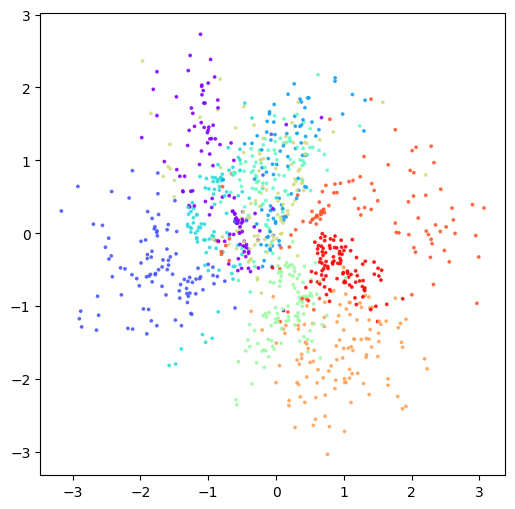

In [22]:
fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
_ = subplot.scatter(embeddings[:, 0], embeddings[:, 1],
                    cmap='rainbow', c=example_labels, alpha=0.8, s=3)

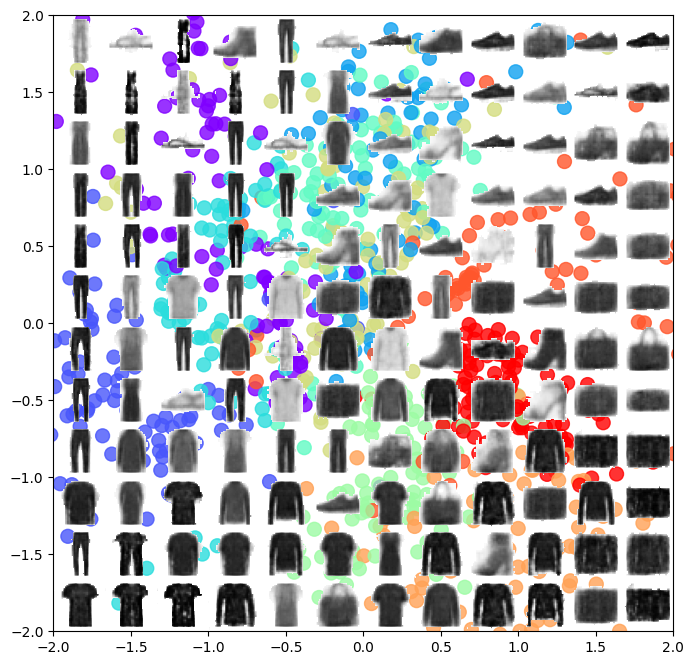

In [23]:
import copy
from matplotlib import colormaps

#x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), 12)
#y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), 12)
x = np.linspace(-2, 2, 12)
y = np.linspace(-2, 2, 12)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv, [0]*len(xv), [0]*len(yv))))

reconstructions = decoder.predict(grid, verbose=0)

fig = plt.figure(figsize=(8, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.scatter(embeddings[:, 0], embeddings[:, 1],
                cmap='rainbow',
                c=example_labels, alpha=0.8, s=100)
subplot.set_xlim(-2, 2)
subplot.set_ylim(-2, 2)
my_cmap = copy.copy(colormaps['gray_r'])
my_cmap.set_bad(alpha=0)
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(12*12):
    subplot = fig.add_subplot(12, 12, i + 1)
    subplot.axis('off')
    img = map(lambda x: np.nan if x < 0.02 else x, reconstructions[i])
    subplot.imshow(np.array(list(img)).reshape((32, 32)),
                   vmin=0, vmax=1, cmap=my_cmap)

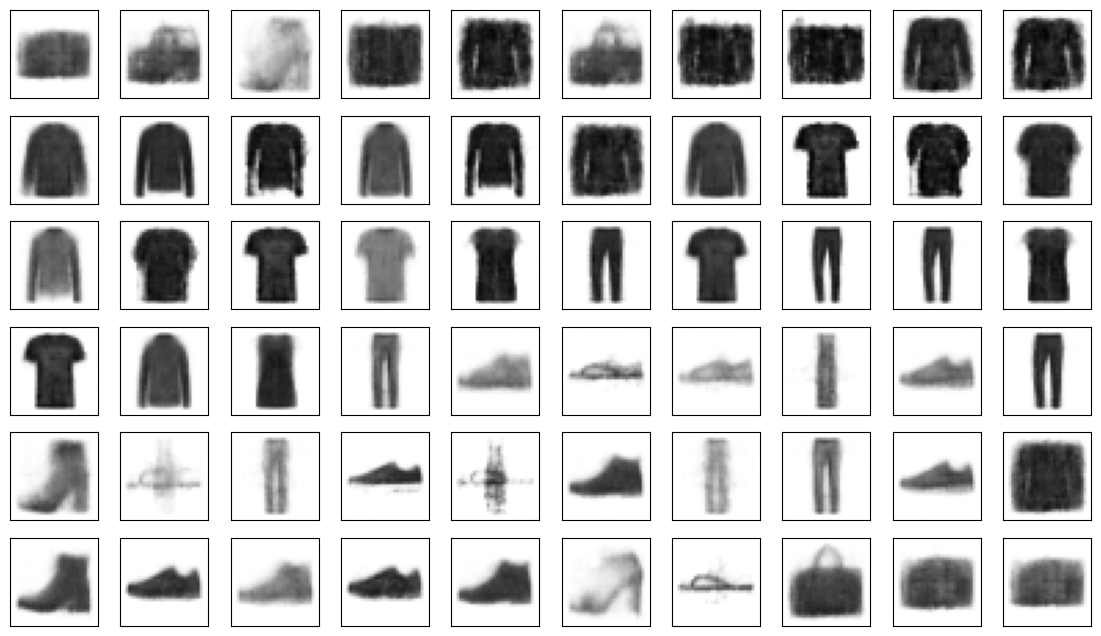

In [33]:
samples = []
for theta in np.linspace(0, 2*np.pi, 60):
    samples.append([1.5*np.cos(theta), 1.5*np.sin(theta), 0, 0])
reconstructions = decoder.predict(samples, verbose=0)

fig = plt.figure(figsize=(14, 8))
for i in range(60):
    subplot = fig.add_subplot(6, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(reconstructions[i].reshape((32, 32)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)